### FNCE 2431: Patrick Anderson, Amanda Delfino, Mario Morales
***
<b>FINAL PROJECT --> Due: 2 DEC 2021</b>


***

#### CHANGE HISTORY:
 - 28 NOV 2021: Normalize columns as listed on decisions excel file
 - 29 NOV 2021: Reviewing columns/features in dataset. Additional dummy features created. Features with objects (strings) converted into numerical values for normalizing.
 - 30 NOV 2021: Normalized non dummy columns / prep for Linear Regression
 - 1 DEC 2021: Drop 'Listing Price' and "Price Per Square Foot Display", also creating two versions of output based on different datasets.
 - 2 DEC 2021: Adding Random Forest Regressor

***

In [1]:
import os
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [ ]:
from google.colab import drive
drive.mount("/content/Drive/",force_remount=True)
os.chdir('/content/Drive/MyDrive/MSIS 2431/MSIS2431GroupWork')

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)
# pd.set_option('display.min_rows', 25)
# Import raw Loan.csv data
df = pd.read_csv('Working Dataset.csv')

In [3]:
df.describe(include = 'all') #Listing all columns with various datatypes

,# of Rooms,# of Units,San Francisco,San Jose,Sacramento,Oakland,Walnut Creek,AgentHitCounter,Association,Association Pool,Association Total,Association Fee Includes,Bathrooms,Bedrooms,Selling Date,DOM,BARI,BERD,CCRD,EBRD,MLS,MLSL,SACM,Listing Price,Latitude,Longitude,On Market Date,Days_Between,Date of Week,Week or Weekend,Pool,Price Per Square Foot Display,PublicHitCounter,Selling Price,SP%LP,Square Footage
count,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,2362.000000,14174.000000,14174.000000,14174.000000,13367,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,1.417400e+04,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,11238.000000,14174.000000,2362.000000,1.417400e+04,14174.000000,14174.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Management,Common Areas,Maintenance Exterior,S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.263440,69.868421,0.152462,0.094680,0.054748,0.049527,0.047975,272.120660,0.994920,0.439890,5538.784888,NaN,1.883307,2.051150,44037.033724,35.269860,0.114082,0.098490,0.100889,0.089601,0.152392,0.273529,0.171017,6.814289e+05,37.496208,-120.973676,43969.964795,70.532665,4.411316,0.124806,0.620929,589.076521,39.142676,6.843472e+05,100.426469,1169.595174
std,2.691142,287.109745,0.359481,0.292783,0.227496,0.216974,0.213721,172.938821,0.071093,0.496391,3672.653093,NaN,0.753036,0.740037,104.169692,42.642355,0.317922,0.297987,0.301192,0.285619,0.359413,0.445786,0.376537,4.876877e+05,3.541327,11.327518,117.532614,58.898853,1.665790,0.330510,0.485177,309.432554,46.774092,4.842967e+05,4.969700,402.286894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,43831.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.750000e+04,0.000000,-123.795914,42220.000000,0.000000,1.000000,0.000000,0.000000,3.090000,0.000000,2.800000e+03,0.660000,243.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.000000,1.000000,0.000000,3780.000000,NaN,1.000000,2.000000,43944.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.750000e+05,37.558323,-122.391273,43881.000000,38.000000,3.000000,0.000000,0.000000,355.980000,11.000000,3.775000e+05,98.170000,898.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,257.500000,1.000000,0.000000,4848.000000,NaN,2.000000,2.000000,44053.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.850000e+05,37.783073,-122.070060,43988.000000,53.000000,5.000000,0.000000,1.000000,536.835000,27.500000,5.847500e+05,100.000000,1100.000000
75%,5.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,368.000000,1.000000,1.000000,6336.000000,NaN,2.000000,2.000000,44127.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.399998e+05,38.001221,-121.851179,44063.750000,84.000000,6.000000,0.000000,1.000000,760.075000,52.000000,8.450000e+05,101.760000,1378.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14174 entries, 0 to 14173
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   # of Rooms                     14174 non-null  int64  
 1   # of Units                     14174 non-null  int64  
 2   San Francisco                  14174 non-null  int64  
 3   San Jose                       14174 non-null  int64  
 4   Sacramento                     14174 non-null  int64  
 5   Oakland                        14174 non-null  int64  
 6   Walnut Creek                   14174 non-null  int64  
 7   AgentHitCounter                2362 non-null   float64
 8   Association                    14174 non-null  int64  
 9   Association Pool               14174 non-null  int64  
 10  Association Total              14174 non-null  int64  
 11  Association Fee Includes       13367 non-null  object 
 12  Bathrooms                      14174 non-null 

In [5]:
df.head(3)

,# of Rooms,# of Units,San Francisco,San Jose,Sacramento,Oakland,Walnut Creek,AgentHitCounter,Association,Association Pool,Association Total,Association Fee Includes,Bathrooms,Bedrooms,Selling Date,DOM,BARI,BERD,CCRD,EBRD,MLS,MLSL,SACM,Listing Price,Latitude,Longitude,On Market Date,Days_Between,Date of Week,Week or Weekend,Pool,Price Per Square Foot Display,PublicHitCounter,Selling Price,SP%LP,Square Footage
0,0,4,1,0,0,0,0,283.0,1,0,8000,"Maintenance Exterior,Homeowners Insurance",4,4,44137,13,0,0,0,0,1,0,0,6495000,37.792233,-122.438538,44120,17,6,0,NaN,1239.50,38.0,6495000,100.00,5240
1,0,2,1,0,0,0,0,375.0,1,0,0,NaN,2,8,44183,123,0,0,0,0,1,0,0,4500000,37.796399,-122.444108,44050,133,6,0,NaN,912.15,38.0,4610000,102.44,5054
2,0,146,1,0,0,0,0,198.0,1,0,64356,"Door Person,Earthquake Insurance,Maintenance E...",5,4,44193,0,0,0,0,0,1,0,0,12555000,37.786060,-122.402573,44193,7,2,0,NaN,2726.38,3.0,12555000,100.00,4605


### Data Cleaning

In [6]:
df.isna().sum() #Finding number of null values in each feature

# of Rooms                           0
# of Units                           0
San Francisco                        0
San Jose                             0
Sacramento                           0
Oakland                              0
Walnut Creek                         0
AgentHitCounter                  11812
Association                          0
Association Pool                     0
Association Total                    0
Association Fee Includes           807
Bathrooms                            0
Bedrooms                             0
Selling Date                         0
DOM                                  0
BARI                                 0
BERD                                 0
CCRD                                 0
EBRD                                 0
MLS                                  0
MLSL                                 0
SACM                                 0
Listing Price                        0
Latitude                             0
Longitude                

In [7]:
print(df['AgentHitCounter'].isna().sum()/len(df))
print(df['PublicHitCounter'].isna().sum()/len(df))

0.8333568505714689
0.8333568505714689


 - <b>'AgentHitCounter' and 'PublicHitCounter'</b> describe number of internet search hits by real estate agents and the public for each record.
 - Each feature has 83% null or missing values, will delete both.

In [8]:
df['Association Fee Includes'].nunique()

4203

 - Our team has decided to also delete <b>'Association Fee Includes'</b>; too many unique values (4203) to separate into dummy columns

In [9]:
# Dropping columns marked for deletion
df.drop(columns = ['AgentHitCounter','PublicHitCounter','Association Fee Includes','Pool',\
                   'Listing Price','Price Per Square Foot Display' ], inplace = True)

In [10]:
df.isna().sum() # All null values removed

# of Rooms           0
# of Units           0
San Francisco        0
San Jose             0
Sacramento           0
Oakland              0
Walnut Creek         0
Association          0
Association Pool     0
Association Total    0
Bathrooms            0
Bedrooms             0
Selling Date         0
DOM                  0
BARI                 0
BERD                 0
CCRD                 0
EBRD                 0
MLS                  0
MLSL                 0
SACM                 0
Latitude             0
Longitude            0
On Market Date       0
Days_Between         0
Date of Week         0
Week or Weekend      0
Selling Price        0
SP%LP                0
Square Footage       0
dtype: int64

In [11]:
df.head(3)

,# of Rooms,# of Units,San Francisco,San Jose,Sacramento,Oakland,Walnut Creek,Association,Association Pool,Association Total,Bathrooms,Bedrooms,Selling Date,DOM,BARI,BERD,CCRD,EBRD,MLS,MLSL,SACM,Latitude,Longitude,On Market Date,Days_Between,Date of Week,Week or Weekend,Selling Price,SP%LP,Square Footage
0,0,4,1,0,0,0,0,1,0,8000,4,4,44137,13,0,0,0,0,1,0,0,37.792233,-122.438538,44120,17,6,0,6495000,100.00,5240
1,0,2,1,0,0,0,0,1,0,0,2,8,44183,123,0,0,0,0,1,0,0,37.796399,-122.444108,44050,133,6,0,4610000,102.44,5054
2,0,146,1,0,0,0,0,1,0,64356,5,4,44193,0,0,0,0,0,1,0,0,37.786060,-122.402573,44193,7,2,0,12555000,100.00,4605


In [12]:
df['Week or Weekend'].value_counts()

0    12405
1     1769
Name: Week or Weekend, dtype: int64

In [13]:
df['BARI'].value_counts()

0    12557
1     1617
Name: BARI, dtype: int64

In [14]:
df['Association Pool'].value_counts()

0    7939
1    6235
Name: Association Pool, dtype: int64

In [15]:
df['Association'].value_counts()

1    14102
0       72
Name: Association, dtype: int64

In [16]:
df['San Francisco'].value_counts()

0    12013
1     2161
Name: San Francisco, dtype: int64

#### Dummy columns list:
- San Francisco, San Jose, Sacramento, Oakland, Walnut Creek, Association, Association Pool, 
- BARI, BERD, CCRD, EBRD, MLS, MLSL, SACM, Week or Weekend

***

## Normalizing Columns
 - Using <b>scikitlearn MinMaxScaler()</b>
 - MinMax formula for reference: <b>xnorm = (xi – xmin) / (xmax – xmin)</b>
 - <b>Dummy columns</b> will not be normalized

In [17]:
from sklearn.preprocessing import MinMaxScaler

#### Normalizing non-binary columns (Continuous 0 to 1)
 - Normalized columns will have <b>'_n'</b> appended to name

In [18]:

X = np.array(df['# of Rooms']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['# of Rooms_n'] = X_scaled.reshape(1,-1)[0]

In [19]:

X = np.array(df['# of Units']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['# of Units_n'] = X_scaled.reshape(1,-1)[0]

In [20]:

X = np.array(df['Association Total']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['Association Total_n'] = X_scaled.reshape(1,-1)[0]

In [21]:

X = np.array(df['Bathrooms']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['Bathrooms_n'] = X_scaled.reshape(1,-1)[0]

In [22]:

X = np.array(df['Bedrooms']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['Bedrooms_n'] = X_scaled.reshape(1,-1)[0]

In [23]:

X = np.array(df['Selling Date']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['Selling Date_n'] = X_scaled.reshape(1,-1)[0]

In [24]:

X = np.array(df['DOM']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['DOM_n'] = X_scaled.reshape(1,-1)[0]

In [25]:

X = np.array(df['Latitude']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['Latitude_n'] = X_scaled.reshape(1,-1)[0]

In [26]:

X = np.array(df['Longitude']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['Longitude_n'] = X_scaled.reshape(1,-1)[0]

In [27]:

X = np.array(df['On Market Date']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['On Market Date_n'] = X_scaled.reshape(1,-1)[0]

In [28]:

X = np.array(df['Days_Between']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['Days_Between_n'] = X_scaled.reshape(1,-1)[0]

In [29]:

X = np.array(df['Date of Week']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['Date of Week_n'] = X_scaled.reshape(1,-1)[0]

In [30]:

X = np.array(df['Square Footage']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['Square Footage_n'] = X_scaled.reshape(1,-1)[0]

In [31]:

X = np.array(df['Selling Price']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['Selling Price_n'] = X_scaled.reshape(1,-1)[0]

In [32]:

X = np.array(df['SP%LP']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['SP%LP_n'] = X_scaled.reshape(1,-1)[0]

In [33]:
# Dropping all non-normalized columns
df.drop(columns =['# of Rooms','# of Units','Association Total','Bathrooms','Bedrooms','Selling Date', \
                  'DOM','Latitude','Longitude','On Market Date','Days_Between', \
                  'Date of Week','Square Footage','Selling Price','SP%LP'], inplace = True)

In [34]:
df.head(3) # Normalized columns appended to dataframe

,San Francisco,San Jose,Sacramento,Oakland,Walnut Creek,Association,Association Pool,BARI,BERD,CCRD,EBRD,MLS,MLSL,SACM,Week or Weekend,# of Rooms_n,# of Units_n,Association Total_n,Bathrooms_n,Bedrooms_n,Selling Date_n,DOM_n,Latitude_n,Longitude_n,On Market Date_n,Days_Between_n,Date of Week_n,Square Footage_n,Selling Price_n,SP%LP_n
0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0,0.000597,0.067476,0.500,0.5,0.838356,0.022414,0.951110,0.010965,0.961538,0.009529,0.833333,1.000000,0.517216,0.536799
1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0,0.000299,0.000000,0.250,1.0,0.964384,0.212069,0.951215,0.010920,0.926113,0.074552,0.833333,0.962778,0.367043,0.549984
2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0,0.021791,0.542814,0.625,0.5,0.991781,0.000000,0.950955,0.011255,0.998482,0.003924,0.166667,0.872924,1.000000,0.536799


In [35]:
df.describe() # Entire dataframe normalized

,San Francisco,San Jose,Sacramento,Oakland,Walnut Creek,Association,Association Pool,BARI,BERD,CCRD,EBRD,MLS,MLSL,SACM,Week or Weekend,# of Rooms_n,# of Units_n,Association Total_n,Bathrooms_n,Bedrooms_n,Selling Date_n,DOM_n,Latitude_n,Longitude_n,On Market Date_n,Days_Between_n,Date of Week_n,Square Footage_n,Selling Price_n,SP%LP_n
count,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000,14174.000000
mean,0.152462,0.094680,0.054748,0.049527,0.047975,0.994920,0.439890,0.114082,0.098490,0.100889,0.089601,0.152392,0.273529,0.171017,0.124806,0.075448,0.010428,0.046717,0.235413,0.256394,0.564476,0.060810,0.943660,0.022798,0.885610,0.039536,0.568553,0.185430,0.054297,0.539103
std,0.359481,0.292783,0.227496,0.216974,0.213721,0.071093,0.496391,0.317922,0.297987,0.301192,0.285619,0.359413,0.445786,0.376537,0.330510,0.089705,0.042852,0.030977,0.094130,0.092505,0.285396,0.073521,0.089124,0.091502,0.059480,0.033015,0.277632,0.080506,0.038583,0.026855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031883,0.125000,0.250000,0.309589,0.013793,0.945224,0.011346,0.840587,0.021300,0.333333,0.131079,0.029851,0.526910
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040891,0.250000,0.250000,0.608219,0.034483,0.950880,0.013941,0.894737,0.029709,0.666667,0.171503,0.046362,0.536799
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.166667,0.007612,0.053441,0.250000,0.250000,0.810959,0.081034,0.956370,0.015709,0.933072,0.047085,0.833333,0.227136,0.067096,0.546309
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***

### Correlation Heat Map

In [37]:
features = ['San Francisco','San Jose','Sacramento','Oakland','Walnut Creek','Association','Association Pool', \
            'BARI','BERD','CCRD','EBRD','MLS','MLSL','SACM','Week or Weekend','# of Rooms_n','# of Units_n', \
            'Association Total_n','Bathrooms_n','Bedrooms_n','Selling Date_n','DOM_n','Latitude_n','Longitude_n', \
            'On Market Date_n','Days_Between_n','Date of Week_n','Square Footage_n','Selling Price_n','SP%LP_n']

<IPython.core.display.Javascript object>


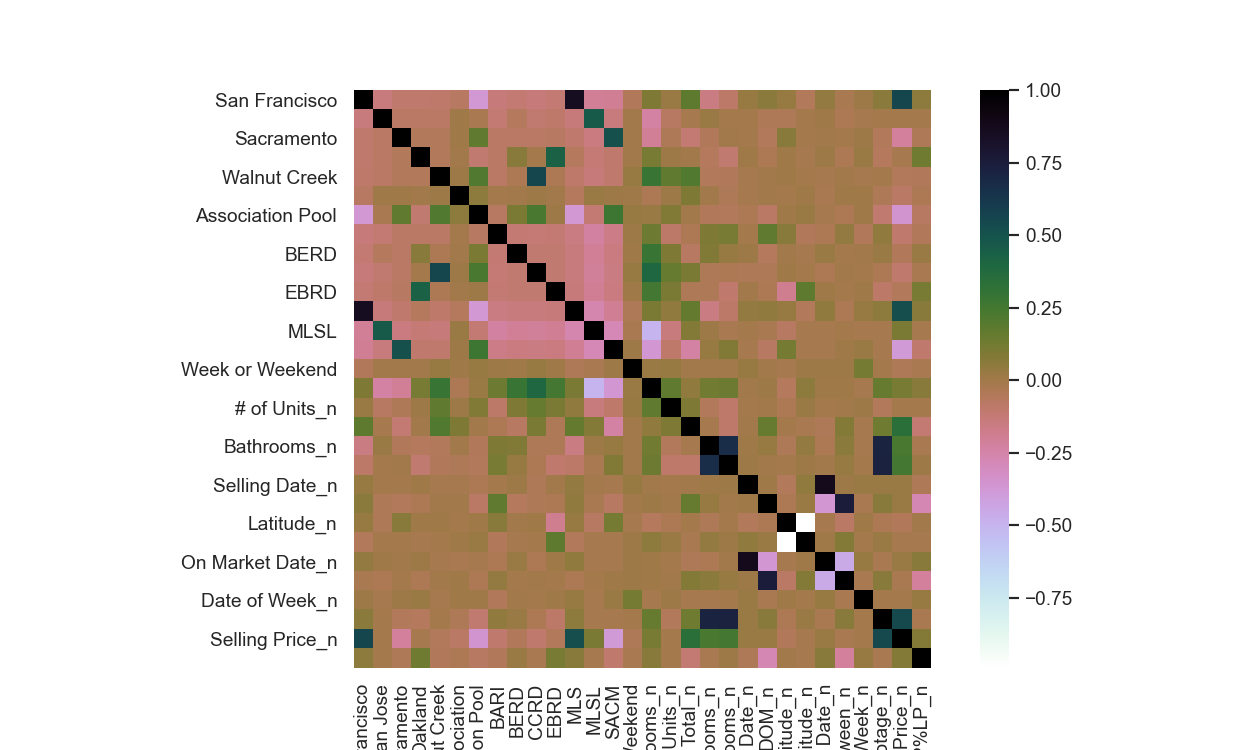

<AxesSubplot:>

In [38]:
sns.set()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df[features].corr(),annot=False, fmt=".2f", square=True, cmap='cubehelix_r', ax=ax)

In [36]:
# Display correlation matrix with values
corr_matrix = round(df.corr(),2)
print(corr_matrix)

                     San Francisco  San Jose  Sacramento  Oakland  \
San Francisco                 1.00     -0.14       -0.10    -0.10   
San Jose                     -0.14      1.00       -0.08    -0.07   
Sacramento                   -0.10     -0.08        1.00    -0.05   
Oakland                      -0.10     -0.07       -0.05     1.00   
Walnut Creek                 -0.10     -0.07       -0.05    -0.05   
Association                  -0.07      0.01        0.01     0.00   
Association Pool             -0.37     -0.02        0.17    -0.11   
BARI                         -0.13     -0.11       -0.08    -0.07   
BERD                         -0.12     -0.06       -0.08     0.07   
CCRD                         -0.13     -0.10       -0.08    -0.01   
EBRD                         -0.12     -0.09       -0.07     0.43   
MLS                           0.86     -0.13       -0.10    -0.06   
MLSL                         -0.20      0.47       -0.15    -0.13   
SACM                         -0.19

***

### Exporting Dataset

In [ ]:
# EXECUTE CODE IF YOU NEED TO EXPORT THIS DATASET

df.to_csv (r'selling_price2.csv', index = False, header=True)


***

## Linear Regression, Version #1

***

## Run Regression for Predicting Selling Price

In [39]:
df.head(2)

,San Francisco,San Jose,Sacramento,Oakland,Walnut Creek,Association,Association Pool,BARI,BERD,CCRD,EBRD,MLS,MLSL,SACM,Week or Weekend,# of Rooms_n,# of Units_n,Association Total_n,Bathrooms_n,Bedrooms_n,Selling Date_n,DOM_n,Latitude_n,Longitude_n,On Market Date_n,Days_Between_n,Date of Week_n,Square Footage_n,Selling Price_n,SP%LP_n
0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0,0.000597,0.067476,0.50,0.5,0.838356,0.022414,0.951110,0.010965,0.961538,0.009529,0.833333,1.000000,0.517216,0.536799
1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0,0.000299,0.000000,0.25,1.0,0.964384,0.212069,0.951215,0.010920,0.926113,0.074552,0.833333,0.962778,0.367043,0.549984


In [40]:
%pylab inline
import sklearn as sk

Populating the interactive namespace from numpy and matplotlib


C:\Users\SuperMCM\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [41]:
# Create the X and Y datasets

X = df.drop('Selling Price_n',axis=1)

Y = df['Selling Price_n']

In [42]:
X.head(2)

,San Francisco,San Jose,Sacramento,Oakland,Walnut Creek,Association,Association Pool,BARI,BERD,CCRD,EBRD,MLS,MLSL,SACM,Week or Weekend,# of Rooms_n,# of Units_n,Association Total_n,Bathrooms_n,Bedrooms_n,Selling Date_n,DOM_n,Latitude_n,Longitude_n,On Market Date_n,Days_Between_n,Date of Week_n,Square Footage_n,SP%LP_n
0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0,0.000597,0.067476,0.50,0.5,0.838356,0.022414,0.951110,0.010965,0.961538,0.009529,0.833333,1.000000,0.536799
1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0,0.000299,0.000000,0.25,1.0,0.964384,0.212069,0.951215,0.010920,0.926113,0.074552,0.833333,0.962778,0.549984


### Using Linear Regression (Version 2)

In [43]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,Y)
yhat = reg.predict(X)

In [44]:
from sklearn.metrics import r2_score
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.4f" % sqrt(mean((Y.to_numpy()- yhat)**2)) ) #RMSE
# Explained variance score: 1 is perfect prediction
print('Variance score (R-squared): %.4f' % r2_score(Y,yhat))

Coefficients: 
 [ 3.65800355e-02 -6.18942516e-03  8.18947442e-04  4.52248197e-03
 -3.21284813e-03 -1.64363485e-02 -2.77409454e-03  1.33234418e+11
  1.33234418e+11  1.33234418e+11  1.33234418e+11  1.33234418e+11
  1.33234418e+11  1.33234418e+11 -2.06394491e-04 -1.96057138e-02
 -6.28505961e-03  1.66436128e-01 -2.36469244e-02 -1.81227835e-02
  3.60014215e-03 -2.99587595e-02 -2.03128040e-01 -1.94647939e-01
 -2.53377991e-02 -2.55818677e-02 -1.44360133e-03  2.76836239e-01
  5.25017482e-02]
Mean squared error: 0.0206
Variance score (R-squared): 0.7158


### Using Statsmodel

In [45]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = sm.add_constant(X, prepend=True)
results = sm.OLS(Y,X).fit()   #NOTE X AND Y ARE REVERSED IN OLS(ORDINARY LEAST SQUARES)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Selling Price_n   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1272.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:40:09   Log-Likelihood:                 34940.
No. Observations:               14174   AIC:                        -6.982e+04
Df Residuals:                   14145   BIC:                        -6.960e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1839    

***

## Linear Regression, Version #2
 - [CHANGE]: Using dataset with days of week expanded into dummy columns AND 'Selling Price' NOT NORMALIZED
 - [CHANGE]: 'Monday' column dropped from df1

***

In [46]:
# Grab new dataset with appended dummy variables to normalized data
# This dataset is already 'pre-cleaned'
df1 = pd.read_csv('not_normal_selling_price2.csv')

In [47]:
df1.head(2)

,San Francisco,San Jose,Sacramento,Oakland,Walnut Creek,Association,Association Pool,BARI,BERD,CCRD,EBRD,MLS,MLSL,SACM,Week or Weekend,# of Rooms_n,# of Units_n,Association Total_n,Bathrooms_n,Bedrooms_n,Selling Date_n,DOM_n,Latitude_n,Longitude_n,On Market Date_n,Days_Between_n,Date of Week_n,Square Footage_n,Selling Price,SP%LP_n,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0,0.000597,0.067476,0.50,0.5,0.838356,0.022414,0.951110,0.010965,0.961538,0.009529,0.833333,1.000000,6495000,0.536799,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0,0.000299,0.000000,0.25,1.0,0.964384,0.212069,0.951215,0.010920,0.926113,0.074552,0.833333,0.962778,4610000,0.549984,0,0,0,0,0,1,0


In [48]:
# Dropping Monday column
df1.drop(columns = 'Monday', inplace = True)

### Correlation Heat Map, new dataset

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14174 entries, 0 to 14173
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   San Francisco        14174 non-null  int64  
 1   San Jose             14174 non-null  int64  
 2   Sacramento           14174 non-null  int64  
 3   Oakland              14174 non-null  int64  
 4   Walnut Creek         14174 non-null  int64  
 5   Association          14174 non-null  int64  
 6   Association Pool     14174 non-null  int64  
 7   BARI                 14174 non-null  int64  
 8   BERD                 14174 non-null  int64  
 9   CCRD                 14174 non-null  int64  
 10  EBRD                 14174 non-null  int64  
 11  MLS                  14174 non-null  int64  
 12  MLSL                 14174 non-null  int64  
 13  SACM                 14174 non-null  int64  
 14  Week or Weekend      14174 non-null  int64  
 15  # of Rooms_n         14174 non-null 

In [50]:
features = ['San Francisco','San Jose','Sacramento','Oakland','Walnut Creek','Association','Association Pool', \
            'BARI','BERD','CCRD','EBRD','MLS','MLSL','SACM','Week or Weekend','# of Rooms_n','# of Units_n', \
            'Association Total_n','Bathrooms_n','Bedrooms_n','Selling Date_n','DOM_n','Latitude_n','Longitude_n', \
            'On Market Date_n','Days_Between_n','Date of Week_n','Square Footage_n','Selling Price','SP%LP_n','Sunday', \
           'Tuesday','Wednesday','Thursday','Friday','Saturday']

<AxesSubplot:>

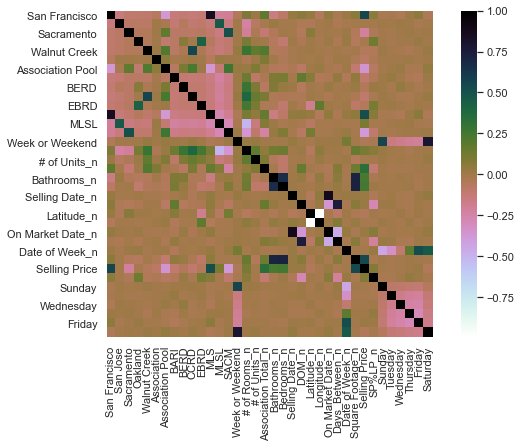

In [51]:
sns.set()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df1[features].corr(),annot=False, fmt=".2f", square=True, cmap='cubehelix_r', ax=ax)

In [52]:
# Display correlation matrix with values
corr_matrix = round(df.corr(),2)
print(corr_matrix)

                     San Francisco  San Jose  Sacramento  Oakland  \
San Francisco                 1.00     -0.14       -0.10    -0.10   
San Jose                     -0.14      1.00       -0.08    -0.07   
Sacramento                   -0.10     -0.08        1.00    -0.05   
Oakland                      -0.10     -0.07       -0.05     1.00   
Walnut Creek                 -0.10     -0.07       -0.05    -0.05   
Association                  -0.07      0.01        0.01     0.00   
Association Pool             -0.37     -0.02        0.17    -0.11   
BARI                         -0.13     -0.11       -0.08    -0.07   
BERD                         -0.12     -0.06       -0.08     0.07   
CCRD                         -0.13     -0.10       -0.08    -0.01   
EBRD                         -0.12     -0.09       -0.07     0.43   
MLS                           0.86     -0.13       -0.10    -0.06   
MLSL                         -0.20      0.47       -0.15    -0.13   
SACM                         -0.19

### Using Linear Regression (Version 2)

In [53]:
# Create new X and Y datasets

X = df1.drop('Selling Price',axis=1) # Independent Variables

Y = df1['Selling Price'] # Dependent Variable

In [54]:
reg = linear_model.LinearRegression()
reg.fit(X,Y)
yhat = reg.predict(X)

In [55]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.4f" % sqrt(mean((Y.to_numpy()- yhat)**2)) ) #RMSE
# Explained variance score: 1 is perfect prediction
print('Variance score (R-squared): %.4f' % r2_score(Y,yhat))

Coefficients: 
 [ 4.52660238e+05 -7.82295815e+04  5.16625478e+03  6.01860759e+04
 -4.08549656e+04 -2.04695948e+05 -3.55379326e+04  3.54939648e+18
  3.54939648e+18  3.54939648e+18  3.54939648e+18  3.54939648e+18
  3.54939648e+18  3.54939648e+18 -9.33700817e+16 -2.37934154e+05
 -8.05446398e+04  2.08521246e+06 -2.93980848e+05 -2.28980834e+05
  4.62583816e+04 -3.78442858e+05 -2.52746929e+06 -2.41697138e+06
 -3.30401172e+05 -3.26312513e+05 -1.72283172e+17  3.47261422e+06
  6.61453421e+05  6.46562197e+16  2.87138618e+16  5.74277238e+16
  8.61415858e+16  1.14855448e+17  2.36939391e+17]
Mean squared error: 258155.3827
Variance score (R-squared): 0.7158


### Using Statsmodel (Version 2)

In [56]:
X = sm.add_constant(X, prepend=True)
results = sm.OLS(Y,X).fit()   #NOTE X AND Y ARE REVERSED IN OLS(ORDINARY LEAST SQUARES)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling Price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1114.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:41:43   Log-Likelihood:            -1.9674e+05
No. Observations:               14174   AIC:                         3.935e+05
Df Residuals:                   14141   BIC:                         3.938e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.278e+06   3

***

## Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = df1.drop('Selling Price',axis=1) 
Y = df1['Selling Price'] 

In [60]:
X.head(2)

,San Francisco,San Jose,Sacramento,Oakland,Walnut Creek,Association,Association Pool,BARI,BERD,CCRD,EBRD,MLS,MLSL,SACM,Week or Weekend,# of Rooms_n,# of Units_n,Association Total_n,Bathrooms_n,Bedrooms_n,Selling Date_n,DOM_n,Latitude_n,Longitude_n,On Market Date_n,Days_Between_n,Date of Week_n,Square Footage_n,SP%LP_n,Sunday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0,0.000597,0.067476,0.50,0.5,0.838356,0.022414,0.951110,0.010965,0.961538,0.009529,0.833333,1.000000,0.536799,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0,0.000299,0.000000,0.25,1.0,0.964384,0.212069,0.951215,0.010920,0.926113,0.074552,0.833333,0.962778,0.549984,0,0,0,0,1,0


 - Train Test Split

In [61]:
train_test_split(X,Y,test_size=0.3,random_state = 0) 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

- Define Functions

In [62]:
def fit_model_cross_validate(algorithm, parameters, X_train, y_train, X_test, y_test):
 gs = GridSearchCV(algorithm, parameters, cv=10, verbose=10)
 gs.fit(X_train, y_train)
 print('Best parameters:', gs.best_params_)
 print('Score on test set:', gs.score(X_test, y_test))
    
 # return both the model and the predictions
 return gs, gs.predict(X_test)

def evaluate_model(X_test, y_test):
 print('MSE', mean_squared_error(X_test, y_test))
 
def check_goodness_of_fit(model, X_train, y_train, X_test, y_test):
 train_score = model.score(X_train, y_train)
 test_score = model.score(X_test, y_test)
 
 print('Train score:', train_score)
 print('Test score:', test_score)

In [63]:
# Run Random Forest Regressor and check model fit

algorithm = RandomForestRegressor()
params = {}
print('\nUsing Feature Reduction\n')
rand_model_pca, rand_pred_pca = fit_model_cross_validate(algorithm, params, X_train, Y_train, X_test, Y_test)
evaluate_model(Y_test, rand_pred_pca)
check_goodness_of_fit(rand_model_pca, X_train, Y_train, X_test, Y_test)


Using Feature Reduction

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.919, total=   6.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV] .................................... , score=0.885, total=   6.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.1s remaining:    0.0s


[CV] .................................... , score=0.909, total=   6.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.8s remaining:    0.0s


[CV] .................................... , score=0.910, total=   7.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   26.9s remaining:    0.0s


[CV] .................................... , score=0.880, total=   6.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.8s remaining:    0.0s


[CV] .................................... , score=0.932, total=   6.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   40.4s remaining:    0.0s


[CV] .................................... , score=0.715, total=   6.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   47.0s remaining:    0.0s


[CV] .................................... , score=0.910, total=   6.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   53.6s remaining:    0.0s


[CV] .................................... , score=0.930, total=   6.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.0min remaining:    0.0s


[CV] .................................... , score=0.897, total=   6.8s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished


Best parameters: {}
Score on test set: 0.8678335707816172
MSE 30552317453.618748
Train score: 0.9858676841042925
Test score: 0.8678335707816172


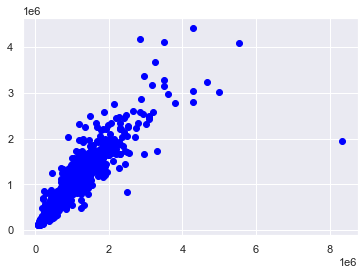

In [64]:
# Plot the Regression

plt.scatter(Y_test, rand_pred_pca, c='blue')